In [1]:
import os
import pickle
from collections import defaultdict, OrderedDict

import networkx as nx
import nxviz as nv
import pandas as pd

import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
import os

path_map = list()
for directory in os.listdir('./combined_graphs/'):
    for file in os.listdir('./combined_graphs/' + directory + '/'):
        poem_ind = file.split('.')[0]
        path_map.append((directory, poem_ind))

In [3]:
path_map[0]

('0', '1')

In [4]:
path_map_length = len(path_map)

similarity_scores = list()
for ind, (p1_ind, p2_ind) in enumerate(path_map):
    if ind % 10 == 0:
        print(f"{ind} -- {round((ind / path_map_length) * 100, 2)}%")
    
    subgraph = nx.read_gpickle(f"./combined_graphs/{p1_ind}/{p2_ind}.gpickle")
    
    BASE_P1_IND = int(p1_ind)
    BASE_P2_IND = int(p2_ind)
    
    similarity_score = 0
    
    base_p1_nodes_data = [(node, data) for node, data in subgraph.nodes(data=True) if data['doc_id'] == BASE_P1_IND]
    
    same_term_scores = 0
    same_term_lengh = 0
    # Add both tf-idf of P1Nn and P2Nn if they are the same words across poems, no synonyms
    for p1_node, data in base_p1_nodes_data:
        # This should only ever result in either 0 or 1 nodes
        p2_neighbors_tf_idf = [
            subgraph.node[n]['tf_idf'] for n in subgraph.neighbors(p1_node) 
            if subgraph.node[n]['doc_id'] == BASE_P2_IND
        ]

        # if it is a one-to-one relationship
        if p2_neighbors_tf_idf:
            same_term_lengh += 1
            
            same_term_scores += data['tf_idf']

            for tf_idf in p2_neighbors_tf_idf:
                same_term_scores += tf_idf
                
    if same_term_scores:
        similarity_score += (same_term_scores / same_term_lengh)

    # Calculate scores for nodes that have synonym relationships
    for p1_node, p1_data in base_p1_nodes_data:
        # for all syns.. *denoted by -1
        for syn_node in [s_n for s_n in subgraph.neighbors(p1_node) if subgraph.node[s_n]['doc_id'] == -1]:
            # all neighbors of syn matching P1Tn where neighbor is not in P1
            syn_p2_neighbors = [n for n in subgraph.neighbors(syn_node) if subgraph.node[n]['doc_id'] != BASE_P1_IND]

            p2_syn_scores = 0
            # for all P2 nodes associated with the syn..
            for p2_node in syn_p2_neighbors:
                p2_syn_scores += (p1_data['tf_idf'] + subgraph.node[p2_node]['tf_idf'])

            similarity_score += (p2_syn_scores / (len(syn_p2_neighbors) * 2))
            
    try:
        similarity_score = similarity_score / len(subgraph.nodes())
    except ZeroDivisionError:
        similarity_score = 0
            
    # Tack on the scores for this combination
    similarity_scores.append((p1_ind, p2_ind, similarity_score))
    
print('Done')

0 -- 0.0%
10 -- 0.03%
20 -- 0.07%
30 -- 0.1%
40 -- 0.13%
50 -- 0.17%
60 -- 0.2%
70 -- 0.23%
80 -- 0.27%
90 -- 0.3%
100 -- 0.33%
110 -- 0.37%
120 -- 0.4%
130 -- 0.43%
140 -- 0.46%
150 -- 0.5%
160 -- 0.53%
170 -- 0.56%
180 -- 0.6%
190 -- 0.63%
200 -- 0.66%
210 -- 0.7%
220 -- 0.73%
230 -- 0.76%
240 -- 0.8%
250 -- 0.83%
260 -- 0.86%
270 -- 0.9%
280 -- 0.93%
290 -- 0.96%
300 -- 1.0%
310 -- 1.03%
320 -- 1.06%
330 -- 1.1%
340 -- 1.13%
350 -- 1.16%
360 -- 1.19%
370 -- 1.23%
380 -- 1.26%
390 -- 1.29%
400 -- 1.33%
410 -- 1.36%
420 -- 1.39%
430 -- 1.43%
440 -- 1.46%
450 -- 1.49%
460 -- 1.53%
470 -- 1.56%
480 -- 1.59%
490 -- 1.63%
500 -- 1.66%
510 -- 1.69%
520 -- 1.73%
530 -- 1.76%
540 -- 1.79%
550 -- 1.83%
560 -- 1.86%
570 -- 1.89%
580 -- 1.92%
590 -- 1.96%
600 -- 1.99%
610 -- 2.02%
620 -- 2.06%
630 -- 2.09%
640 -- 2.12%
650 -- 2.16%
660 -- 2.19%
670 -- 2.22%
680 -- 2.26%
690 -- 2.29%
700 -- 2.32%
710 -- 2.36%
720 -- 2.39%
730 -- 2.42%
740 -- 2.46%
750 -- 2.49%
760 -- 2.52%
770 -- 2.56%
780 -- 2.

5930 -- 19.68%
5940 -- 19.71%
5950 -- 19.74%
5960 -- 19.78%
5970 -- 19.81%
5980 -- 19.84%
5990 -- 19.88%
6000 -- 19.91%
6010 -- 19.94%
6020 -- 19.98%
6030 -- 20.01%
6040 -- 20.04%
6050 -- 20.08%
6060 -- 20.11%
6070 -- 20.14%
6080 -- 20.18%
6090 -- 20.21%
6100 -- 20.24%
6110 -- 20.28%
6120 -- 20.31%
6130 -- 20.34%
6140 -- 20.37%
6150 -- 20.41%
6160 -- 20.44%
6170 -- 20.47%
6180 -- 20.51%
6190 -- 20.54%
6200 -- 20.57%
6210 -- 20.61%
6220 -- 20.64%
6230 -- 20.67%
6240 -- 20.71%
6250 -- 20.74%
6260 -- 20.77%
6270 -- 20.81%
6280 -- 20.84%
6290 -- 20.87%
6300 -- 20.91%
6310 -- 20.94%
6320 -- 20.97%
6330 -- 21.01%
6340 -- 21.04%
6350 -- 21.07%
6360 -- 21.11%
6370 -- 21.14%
6380 -- 21.17%
6390 -- 21.2%
6400 -- 21.24%
6410 -- 21.27%
6420 -- 21.3%
6430 -- 21.34%
6440 -- 21.37%
6450 -- 21.4%
6460 -- 21.44%
6470 -- 21.47%
6480 -- 21.5%
6490 -- 21.54%
6500 -- 21.57%
6510 -- 21.6%
6520 -- 21.64%
6530 -- 21.67%
6540 -- 21.7%
6550 -- 21.74%
6560 -- 21.77%
6570 -- 21.8%
6580 -- 21.84%
6590 -- 21.87%
66

11350 -- 37.66%
11360 -- 37.7%
11370 -- 37.73%
11380 -- 37.76%
11390 -- 37.8%
11400 -- 37.83%
11410 -- 37.86%
11420 -- 37.9%
11430 -- 37.93%
11440 -- 37.96%
11450 -- 38.0%
11460 -- 38.03%
11470 -- 38.06%
11480 -- 38.1%
11490 -- 38.13%
11500 -- 38.16%
11510 -- 38.19%
11520 -- 38.23%
11530 -- 38.26%
11540 -- 38.29%
11550 -- 38.33%
11560 -- 38.36%
11570 -- 38.39%
11580 -- 38.43%
11590 -- 38.46%
11600 -- 38.49%
11610 -- 38.53%
11620 -- 38.56%
11630 -- 38.59%
11640 -- 38.63%
11650 -- 38.66%
11660 -- 38.69%
11670 -- 38.73%
11680 -- 38.76%
11690 -- 38.79%
11700 -- 38.83%
11710 -- 38.86%
11720 -- 38.89%
11730 -- 38.92%
11740 -- 38.96%
11750 -- 38.99%
11760 -- 39.02%
11770 -- 39.06%
11780 -- 39.09%
11790 -- 39.12%
11800 -- 39.16%
11810 -- 39.19%
11820 -- 39.22%
11830 -- 39.26%
11840 -- 39.29%
11850 -- 39.32%
11860 -- 39.36%
11870 -- 39.39%
11880 -- 39.42%
11890 -- 39.46%
11900 -- 39.49%
11910 -- 39.52%
11920 -- 39.56%
11930 -- 39.59%
11940 -- 39.62%
11950 -- 39.65%
11960 -- 39.69%
11970 -- 39.7

16520 -- 54.82%
16530 -- 54.85%
16540 -- 54.89%
16550 -- 54.92%
16560 -- 54.95%
16570 -- 54.99%
16580 -- 55.02%
16590 -- 55.05%
16600 -- 55.09%
16610 -- 55.12%
16620 -- 55.15%
16630 -- 55.19%
16640 -- 55.22%
16650 -- 55.25%
16660 -- 55.28%
16670 -- 55.32%
16680 -- 55.35%
16690 -- 55.38%
16700 -- 55.42%
16710 -- 55.45%
16720 -- 55.48%
16730 -- 55.52%
16740 -- 55.55%
16750 -- 55.58%
16760 -- 55.62%
16770 -- 55.65%
16780 -- 55.68%
16790 -- 55.72%
16800 -- 55.75%
16810 -- 55.78%
16820 -- 55.82%
16830 -- 55.85%
16840 -- 55.88%
16850 -- 55.92%
16860 -- 55.95%
16870 -- 55.98%
16880 -- 56.01%
16890 -- 56.05%
16900 -- 56.08%
16910 -- 56.11%
16920 -- 56.15%
16930 -- 56.18%
16940 -- 56.21%
16950 -- 56.25%
16960 -- 56.28%
16970 -- 56.31%
16980 -- 56.35%
16990 -- 56.38%
17000 -- 56.41%
17010 -- 56.45%
17020 -- 56.48%
17030 -- 56.51%
17040 -- 56.55%
17050 -- 56.58%
17060 -- 56.61%
17070 -- 56.65%
17080 -- 56.68%
17090 -- 56.71%
17100 -- 56.74%
17110 -- 56.78%
17120 -- 56.81%
17130 -- 56.84%
17140 --

21760 -- 72.21%
21770 -- 72.24%
21780 -- 72.27%
21790 -- 72.31%
21800 -- 72.34%
21810 -- 72.37%
21820 -- 72.41%
21830 -- 72.44%
21840 -- 72.47%
21850 -- 72.51%
21860 -- 72.54%
21870 -- 72.57%
21880 -- 72.61%
21890 -- 72.64%
21900 -- 72.67%
21910 -- 72.71%
21920 -- 72.74%
21930 -- 72.77%
21940 -- 72.81%
21950 -- 72.84%
21960 -- 72.87%
21970 -- 72.91%
21980 -- 72.94%
21990 -- 72.97%
22000 -- 73.0%
22010 -- 73.04%
22020 -- 73.07%
22030 -- 73.1%
22040 -- 73.14%
22050 -- 73.17%
22060 -- 73.2%
22070 -- 73.24%
22080 -- 73.27%
22090 -- 73.3%
22100 -- 73.34%
22110 -- 73.37%
22120 -- 73.4%
22130 -- 73.44%
22140 -- 73.47%
22150 -- 73.5%
22160 -- 73.54%
22170 -- 73.57%
22180 -- 73.6%
22190 -- 73.64%
22200 -- 73.67%
22210 -- 73.7%
22220 -- 73.73%
22230 -- 73.77%
22240 -- 73.8%
22250 -- 73.83%
22260 -- 73.87%
22270 -- 73.9%
22280 -- 73.93%
22290 -- 73.97%
22300 -- 74.0%
22310 -- 74.03%
22320 -- 74.07%
22330 -- 74.1%
22340 -- 74.13%
22350 -- 74.17%
22360 -- 74.2%
22370 -- 74.23%
22380 -- 74.27%
22390

26960 -- 89.46%
26970 -- 89.5%
26980 -- 89.53%
26990 -- 89.56%
27000 -- 89.6%
27010 -- 89.63%
27020 -- 89.66%
27030 -- 89.7%
27040 -- 89.73%
27050 -- 89.76%
27060 -- 89.8%
27070 -- 89.83%
27080 -- 89.86%
27090 -- 89.9%
27100 -- 89.93%
27110 -- 89.96%
27120 -- 90.0%
27130 -- 90.03%
27140 -- 90.06%
27150 -- 90.09%
27160 -- 90.13%
27170 -- 90.16%
27180 -- 90.19%
27190 -- 90.23%
27200 -- 90.26%
27210 -- 90.29%
27220 -- 90.33%
27230 -- 90.36%
27240 -- 90.39%
27250 -- 90.43%
27260 -- 90.46%
27270 -- 90.49%
27280 -- 90.53%
27290 -- 90.56%
27300 -- 90.59%
27310 -- 90.63%
27320 -- 90.66%
27330 -- 90.69%
27340 -- 90.73%
27350 -- 90.76%
27360 -- 90.79%
27370 -- 90.82%
27380 -- 90.86%
27390 -- 90.89%
27400 -- 90.92%
27410 -- 90.96%
27420 -- 90.99%
27430 -- 91.02%
27440 -- 91.06%
27450 -- 91.09%
27460 -- 91.12%
27470 -- 91.16%
27480 -- 91.19%
27490 -- 91.22%
27500 -- 91.26%
27510 -- 91.29%
27520 -- 91.32%
27530 -- 91.36%
27540 -- 91.39%
27550 -- 91.42%
27560 -- 91.46%
27570 -- 91.49%
27580 -- 91.52

In [5]:
# now to actually create the matrix
similarities_map = defaultdict(dict)
max_score = 0

# baseline for the matrix
for p1, p2, similarity_score in similarity_scores:
    similarities_map[p1][p2] = similarity_score
    similarities_map[p2][p1] = similarity_score
    
    max_score = similarity_score if similarity_score > max_score else max_score
        
# establish identity
for i in range(len(similarities_map)):
    similarities_map[str(i)][str(i)] = 0

In [6]:
pickle.dump(similarities_map, open('./similarity_map.p', 'wb'))

In [7]:
max_score

0.4178186936258054

In [8]:
assert len(similarities_map) == 246
for i in range(246):
    assert len(similarities_map[str(i)]) == 246

In [9]:
similarities_matrix = pd.DataFrame(
    {str(i): [similarities_map[str(i)][str(j)] / max_score for j in range(len(similarities_map[str(i)]))] 
     for i in range(len(similarities_map))}
)

In [10]:
similarities_matrix.head(10)

,0,1,2,3,4,5,6,7,8,9,...,236,237,238,239,240,241,242,243,244,245
0,0.000000,0.123463,0.066689,0.055444,0.076449,0.041863,0.044225,0.100720,0.048032,0.096424,...,0.080561,0.063746,0.058949,0.069276,0.053847,0.043483,0.047542,0.047010,0.031865,0.029624
1,0.123463,0.000000,0.125699,0.126394,0.092586,0.115756,0.095119,0.073074,0.030708,0.199812,...,0.146117,0.145017,0.161594,0.216355,0.121628,0.099754,0.083761,0.104546,0.073736,0.069029
2,0.066689,0.125699,0.000000,0.090144,0.083767,0.094484,0.087930,0.065035,0.075319,0.143984,...,0.135442,0.135802,0.105061,0.095186,0.079490,0.062654,0.074099,0.062974,0.059700,0.062276
3,0.055444,0.126394,0.090144,0.000000,0.104553,0.105841,0.118191,0.074898,0.087236,0.222916,...,0.116332,0.111904,0.108159,0.167393,0.103446,0.056762,0.098412,0.073456,0.068670,0.058650
4,0.076449,0.092586,0.083767,0.104553,0.000000,0.077919,0.085748,0.129260,0.082086,0.101623,...,0.114092,0.094877,0.072699,0.078304,0.116719,0.081287,0.078874,0.051996,0.055871,0.047031
5,0.041863,0.115756,0.094484,0.105841,0.077919,0.000000,0.164376,0.088369,0.032308,0.126959,...,0.167248,0.144997,0.099619,0.101719,0.130449,0.091542,0.081610,0.104703,0.041097,0.066719
6,0.044225,0.095119,0.087930,0.118191,0.085748,0.164376,0.000000,0.116004,0.149351,0.160957,...,0.134822,0.107001,0.162040,0.153442,0.090668,0.143162,0.159509,0.091841,0.056159,0.080850
7,0.100720,0.073074,0.065035,0.074898,0.129260,0.088369,0.116004,0.000000,0.062287,0.089922,...,0.080225,0.069783,0.097934,0.115674,0.081094,0.104775,0.094619,0.090395,0.084303,0.081179
8,0.048032,0.030708,0.075319,0.087236,0.082086,0.032308,0.149351,0.062287,0.000000,0.080014,...,0.103230,0.162331,0.162808,0.054646,0.042692,0.038371,0.110053,0.051223,0.067001,0.060906
9,0.096424,0.199812,0.143984,0.222916,0.101623,0.126959,0.160957,0.089922,0.080014,0.000000,...,0.095544,0.122924,0.223191,0.172503,0.149057,0.104306,0.080630,0.100480,0.053259,0.062847


In [11]:
# Get the top 3 scores from each row
n_largest = dict()
for i in range(len(similarities_matrix)):
    str_ind = str(i)
    
    top_3_vals = similarities_matrix.nlargest(3, str_ind).loc[:, str_ind].tolist()
    top_3_index = similarities_matrix.nlargest(3, str_ind).loc[:, str_ind].index.tolist()
    
    n_largest[str_ind] = list(zip(top_3_vals, top_3_index))

In [17]:
n_largest

{'0': [(0.2340660470970844, 49),
  (0.16705870350394017, 31),
  (0.15954833243420424, 97)],
 '1': [(0.2544539632914513, 204),
  (0.21761657155831868, 89),
  (0.21635456330413694, 239)],
 '2': [(0.3195089660903212, 121),
  (0.2978655132950103, 57),
  (0.2368887927922729, 176)],
 '3': [(0.24494485311395672, 57),
  (0.23673384902521216, 132),
  (0.23170664697027848, 180)],
 '4': [(0.1887537098235889, 121),
  (0.17092587073115237, 105),
  (0.16771396716233178, 91)],
 '5': [(0.29896246577254787, 57),
  (0.28167971632649624, 49),
  (0.21349748048101075, 67)],
 '6': [(0.26720129725123204, 57),
  (0.2063431234825424, 27),
  (0.20136030268806082, 150)],
 '7': [(0.2310098528591669, 52),
  (0.22335607252793574, 171),
  (0.21971618534702012, 110)],
 '8': [(0.5804217909619117, 11),
  (0.31594247743063486, 62),
  (0.3013623701071969, 197)],
 '9': [(0.24806937979130034, 182),
  (0.2283868179039291, 95),
  (0.22319114400392503, 238)],
 '10': [(0.27596481388946287, 226),
  (0.271156493506181, 67),
  (0

In [16]:
pickle.dump(n_largest, open('./n_largest.p', 'wb'))

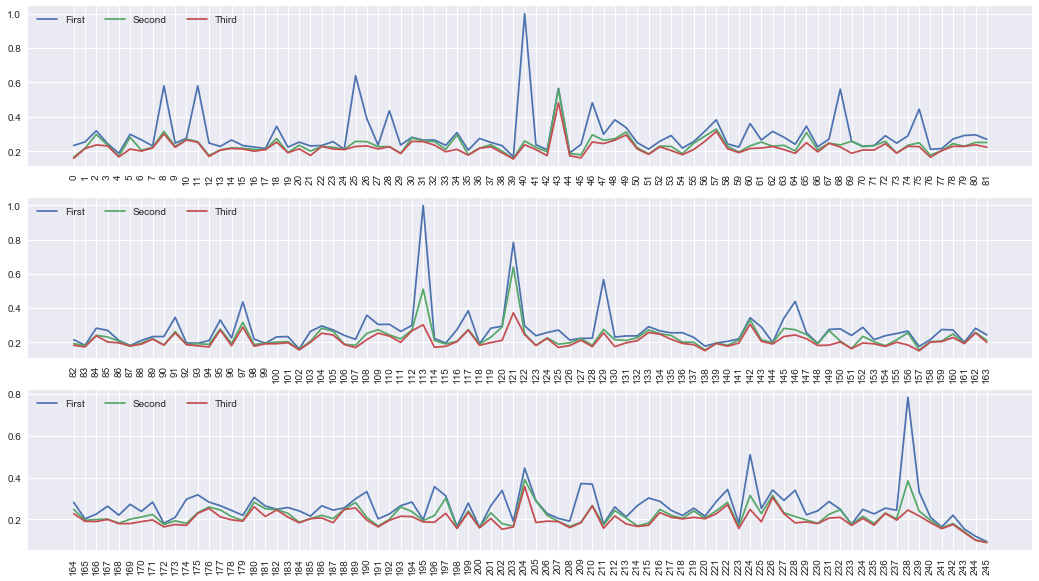

In [12]:
import seaborn as sns

sns.set()

scores = []
for n_set in n_largest.values():
    scores.append([score for score, ind in n_set])

n_largest_keys = list(n_largest.keys())

f = plt.figure(figsize=(18, 10))

base = 82
for i in range(3):
    ax = f.add_subplot(3, 1, i + 1)
    
    plt.plot(n_largest_keys[base*i:base*(i+1)], scores[base*i:base*(i+1)])
    plt.legend(['First', 'Second', 'Third'], ncol=3, loc='upper left');
    plt.xticks(rotation=90)
    
plt.show();

In [13]:
n_largest['180']

[(0.30480436374588665, 142),
 (0.2818490386836921, 30),
 (0.26029939697897125, 40)]

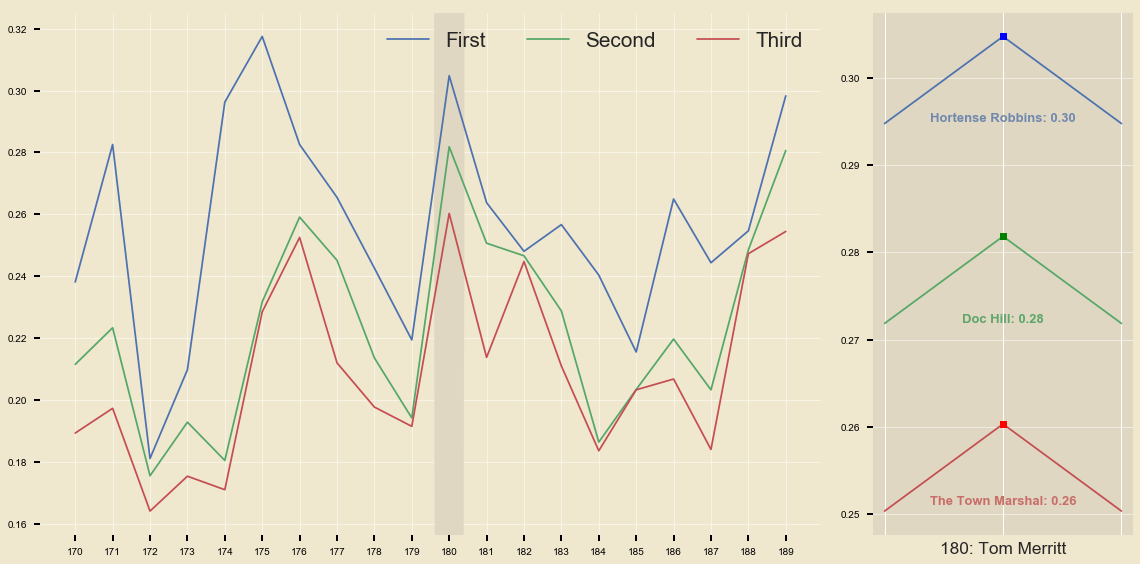

In [14]:
from matplotlib import gridspec


fig = plt.gcf()
fig.set_size_inches(16, 8)
# fig = plt.gcf(figsize=(16, 8)) 
# fig.clear()

fig.patch.set_facecolor('#f0e7cf')

gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1]) 

ax0 = plt.subplot(gs[0])

ax0.plot(n_largest_keys[170:190], scores[170:190])

circle = plt.Circle((10, 0.28), .4, color='#dfd7c1')
plt.gcf().gca().add_artist(circle)

ax0.legend(
    ['First', 'Second', 'Third'], 
    ncol=3, 
    loc='upper right',
    fontsize='xx-large'
)

ax0.tick_params(
    direction='out', 
    length=6, 
    width=2, 
    colors='black',
    grid_alpha=0.5
)

ax0.set_facecolor('#f0e7cf')


ax1 = plt.subplot(gs[1])

ax1.plot(
    ['', '180: Tom Merritt', ' '], 
    [
        [score - 0.01 for score, ind in n_largest['180']],
        [score for score, ind in n_largest['180']],
        [score - 0.01 for score, ind in n_largest['180']]
    ]
)
ax1.plot(['180: Tom Merritt'], [n_largest['180'][0][0]], 'bs')
ax1.plot(['180: Tom Merritt'], [n_largest['180'][1][0]], 'gs')
ax1.plot(['180: Tom Merritt'], [n_largest['180'][2][0]], 'rs')

# Add labels to the plot
style = dict(size=13, ha='center', fontweight='bold')

ax1.text('180: Tom Merritt', 0.295, f"Hortense Robbins: 0.30", color='#7088AF', **style)
ax1.text('180: Tom Merritt', 0.272, f"Doc Hill: 0.28", color='#5EA66A', **style)
ax1.text('180: Tom Merritt', 0.251, f"The Town Marshal: 0.26", color='#C96D6A', **style)

ax1.tick_params(
    axis='y',
    direction='out', 
    length=6, 
    width=2, 
    colors='black',
    grid_alpha=0.5
)

ax1.tick_params(
    axis='x',
    labelsize='x-large'
)

ax1.set_facecolor('#dfd7c1')

plt.tight_layout()
plt.savefig('./top_3_similar.png', facecolor='#f0e7cf');